In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cleaned Train.csv')
df.head()

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,1,23,12,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,1,809.98,26.822620,1,49.574949,80.415295,3,312.494089,2
1,0x1603,2,23,12,19114.12,1824.843333,3,4,3,4,3,4,11.27,4,1,809.98,31.944960,1,49.574949,118.280222,4,284.629162,2
2,0x1604,3,23,12,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,1,809.98,28.609352,1,49.574949,81.699521,5,331.209863,2
3,0x1605,4,23,12,19114.12,1824.843333,3,4,3,4,5,4,6.27,4,1,809.98,31.377862,1,49.574949,199.458074,6,223.451310,2
4,0x1606,5,23,12,19114.12,1824.843333,3,4,3,4,6,4,11.27,4,1,809.98,24.797347,1,49.574949,41.420153,2,341.489231,2


In [3]:
df.set_index('ID', drop=True, inplace=True)

X = df.drop('Credit_Score', axis=1)
y = df[['Credit_Score']]
y['Credit_Score'] = y['Credit_Score'].astype('category')

In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Credit_Score  100000 non-null  category
dtypes: category(1)
memory usage: 879.0+ KB


In [5]:
y.head()

,Credit_Score
ID,
0x1602,2
0x1603,2
0x1604,2
0x1605,2
0x1606,2


In [6]:
# Converting Cateogry columns to 'category' data type
cat_col = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for i in cat_col:
    X[i] = X[i].astype('category')

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Month                     100000 non-null  category
 1   Age                       100000 non-null  int64   
 2   Occupation                100000 non-null  category
 3   Annual_Income             100000 non-null  float64 
 4   Monthly_Inhand_Salary     100000 non-null  float64 
 5   Num_Bank_Accounts         100000 non-null  int64   
 6   Num_Credit_Card           100000 non-null  int64   
 7   Interest_Rate             100000 non-null  int64   
 8   Num_of_Loan               100000 non-null  int64   
 9   Delay_from_due_date       100000 non-null  int64   
 10  Num_of_Delayed_Payment    100000 non-null  int64   
 11  Changed_Credit_Limit      100000 non-null  float64 
 12  Num_Credit_Inquiries      100000 non-null  int64   
 13  Credit_Mix                10

## Descriptive Statistics

In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.316340,10.764812,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4197.393268,3186.540184,303.645417,1626.594167,3095.905000,5957.715000,15204.633333
Num_Bank_Accounts,100000.0,5.367120,2.593856,-1.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.532240,2.068324,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.090050,14.829336,-1.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.319690,6.224760,0.000000,9.000000,14.000000,18.000000,25.000000
Changed_Credit_Limit,100000.0,10.472003,6.657893,0.000000,5.370000,9.400000,14.850000,36.970000


In [9]:
X.describe(include='category').T

,count,unique,top,freq
Month,100000,8,1,12500
Occupation,100000,15,7,7096
Credit_Mix,100000,4,2,45723
Payment_of_Min_Amount,100000,3,2,52326
Payment_Behaviour,100000,7,6,27940


## Univariate, Multivariate Analysis

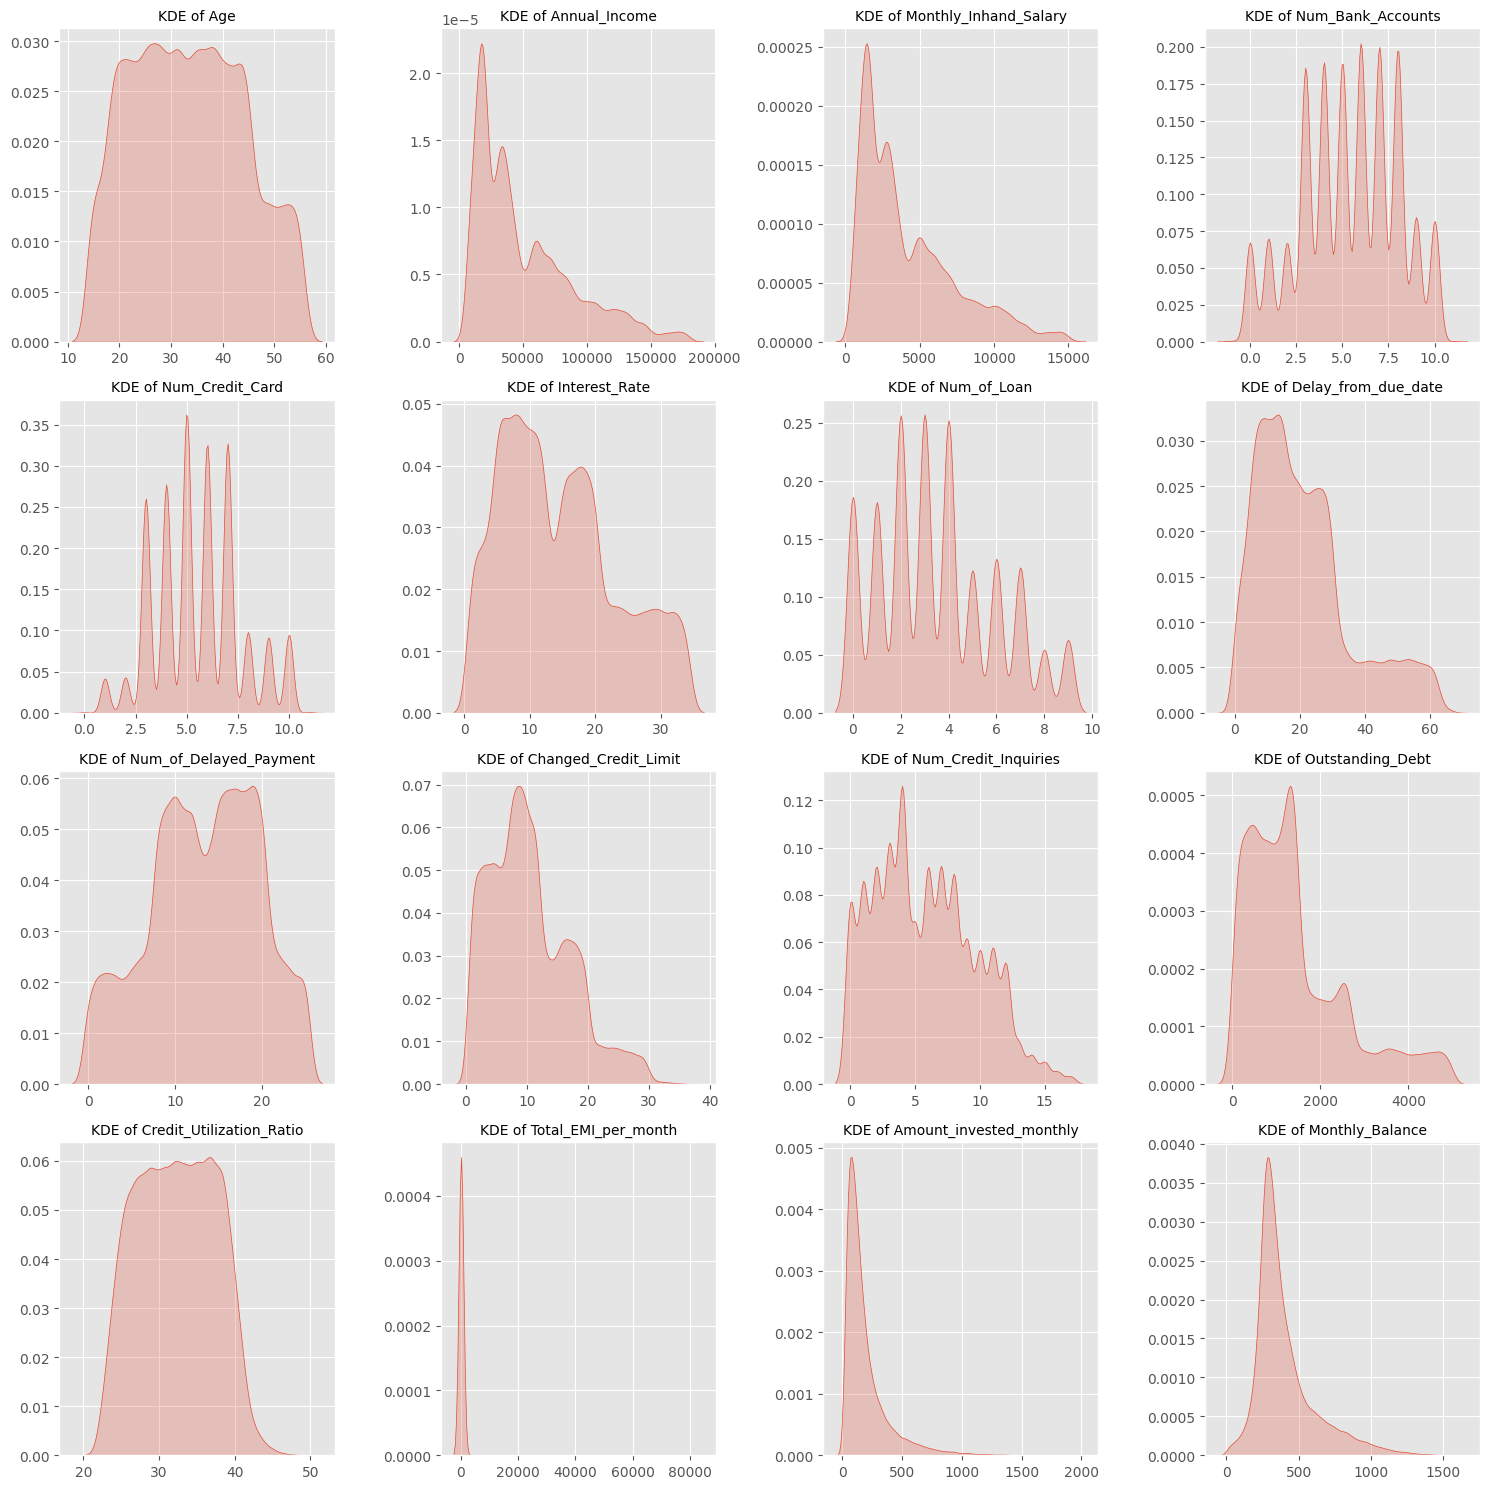

In [10]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
axes = axes.ravel()

for i,j in enumerate(X.select_dtypes(np.number).columns):
    sns.kdeplot(X[j], fill=True, ax=axes[i])
    axes[i].set_title(f"KDE of {j}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

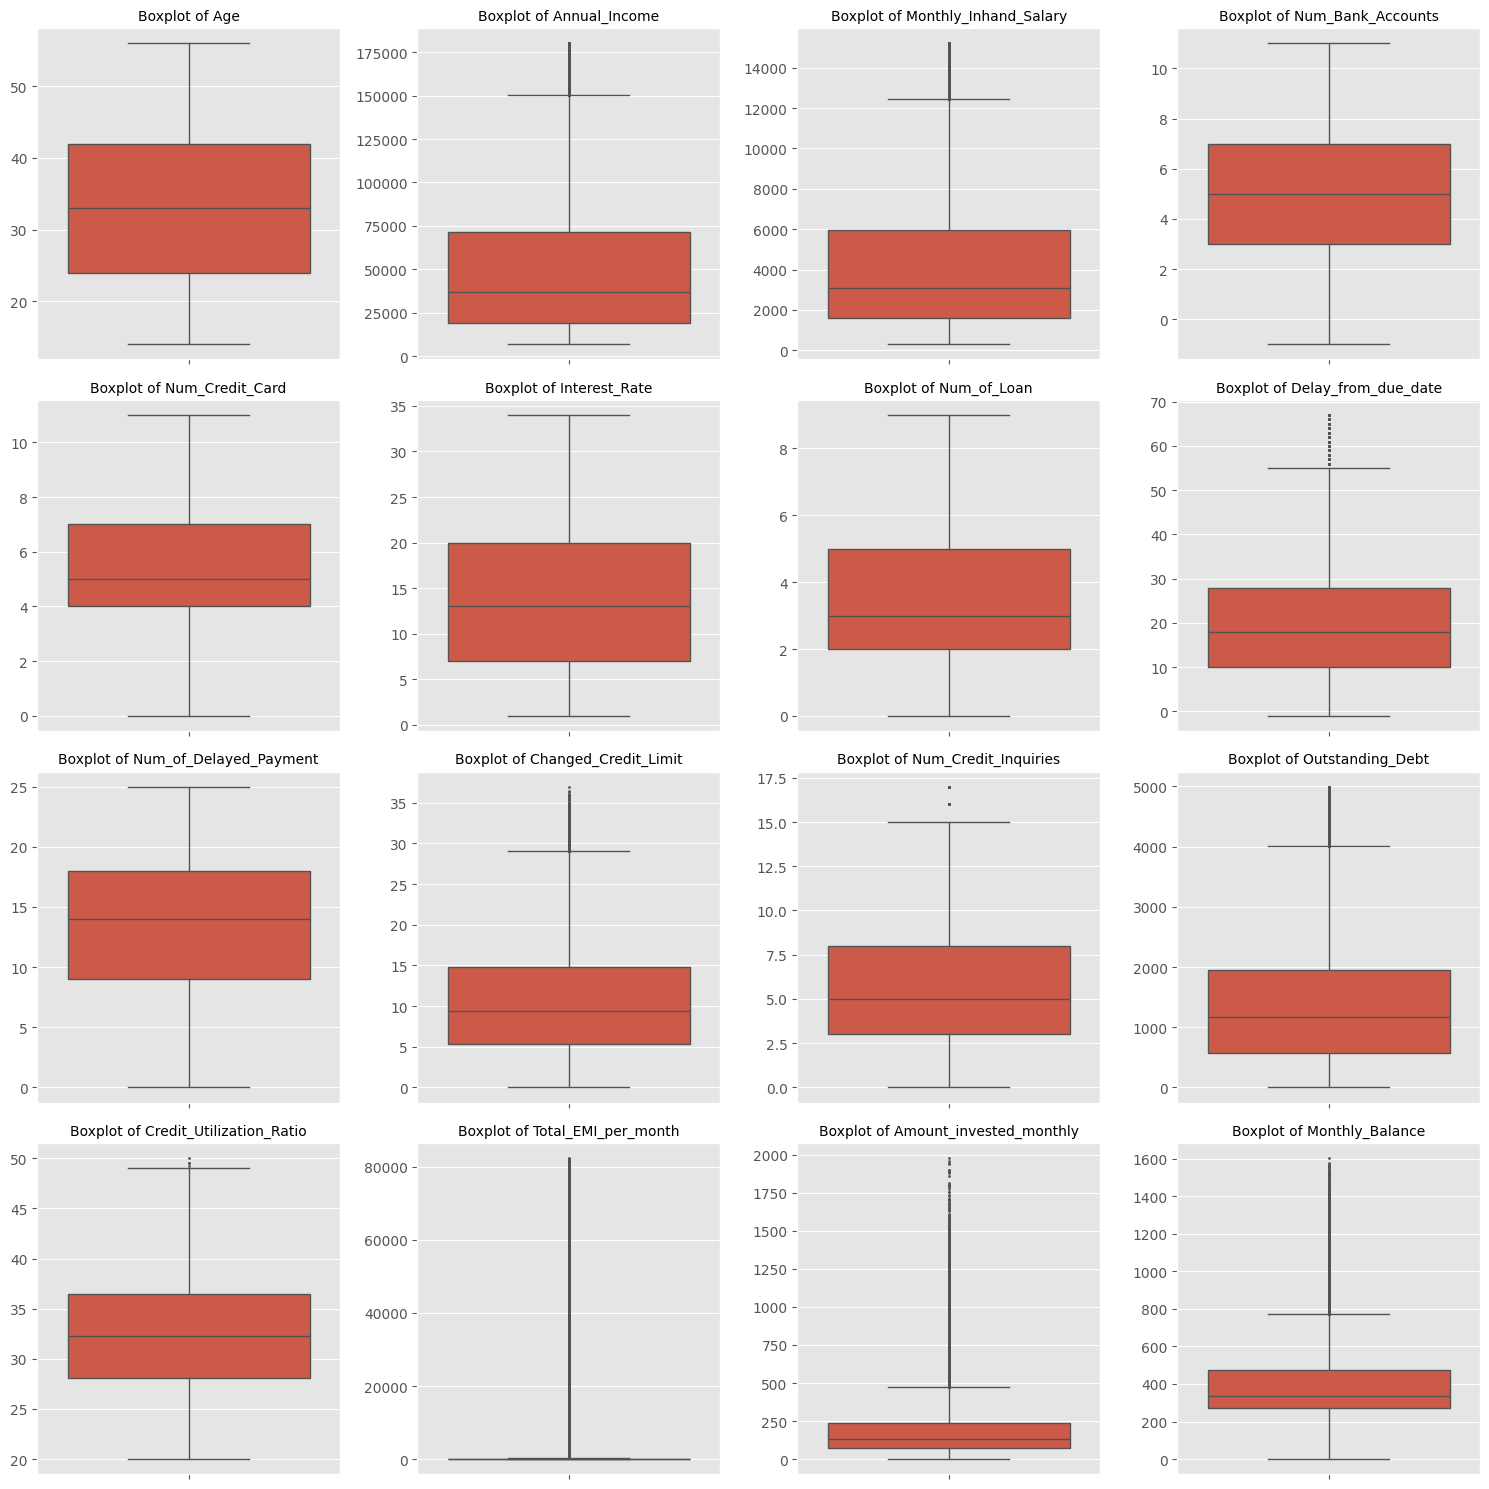

In [11]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
axes = axes.ravel()

for i,j in enumerate(X.select_dtypes(np.number).columns):
    sns.boxplot(y=X[j], ax=axes[i], fliersize=1)
    axes[i].set_title(f"Boxplot of {j}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Looking at Distributions and Boxplots of Numerical features, none of them follow Normal distribution and there are outliers that need to be addressed. But since we are not allowed to drop any records as part of the project we'll be proceeding with the entire data only.

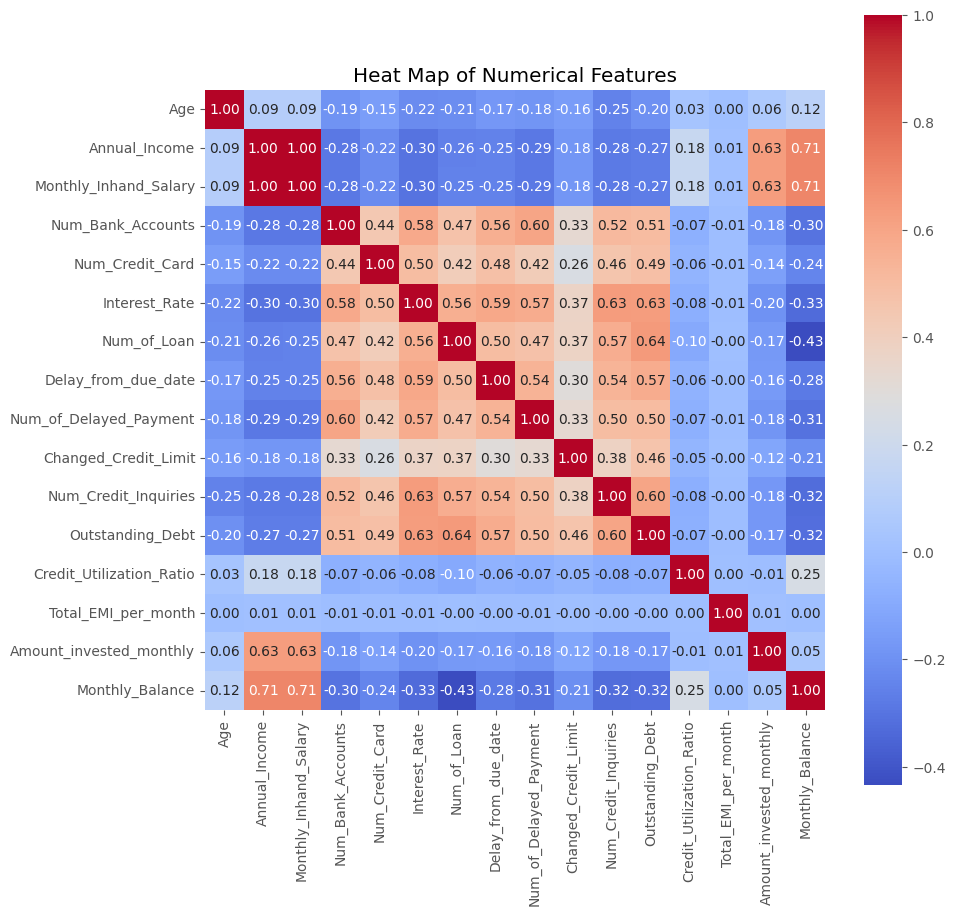

In [12]:
# Looking at Heat Map of Numerical features
corr = X.select_dtypes(np.number).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heat Map of Numerical Features')
plt.show()

#### Highest Correlation is between 'Monthly_Inhand_Salary' & 'Monthly Balance' which is obvious, as monthly salary is high the monthly balance would also be higher and vice-versa.
#### Lowest Correlation is between 'Monthly Balance' & 'Num_of_Loan' which is again obvious, since monthly balance is high it suggests salary is high and implies loans taken are relatively lower.

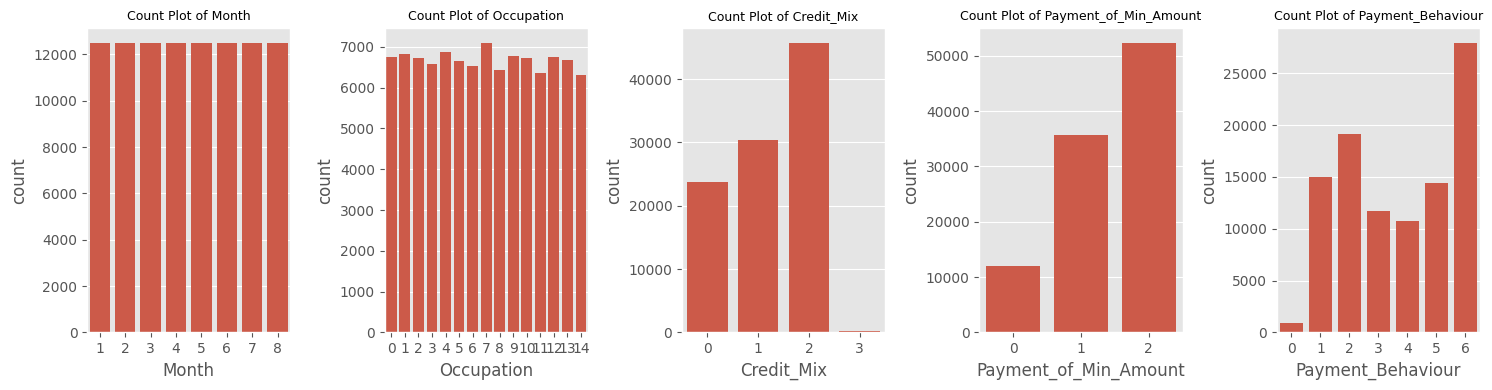

In [13]:
# Looking at Category features
fig, ax = plt.subplots(1, 5, figsize=(15,4))
for i,j in enumerate(X.select_dtypes('category').columns):
    sns.countplot(X, x=j, ax=ax[i])
    ax[i].set_title(f"Count Plot of {j}", fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [37]:
# Looking at distribution of Target class
df['Credit_Score'].value_counts()

Credit_Score
1    53174
0    28998
2    17828
Name: count, dtype: int64

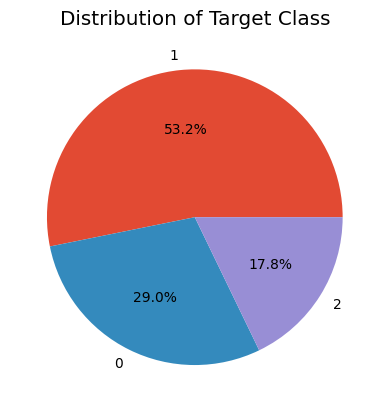

In [36]:
plt.pie(df['Credit_Score'].value_counts(), labels=df['Credit_Score'].value_counts().index, autopct='%.1f%%')

plt.title('Distribution of Target Class')
plt.show()

### More than half of the records point to Standard credit score followed by Poor credit score.

### Looking at Boxplots and Stripplots for each Credit_Score

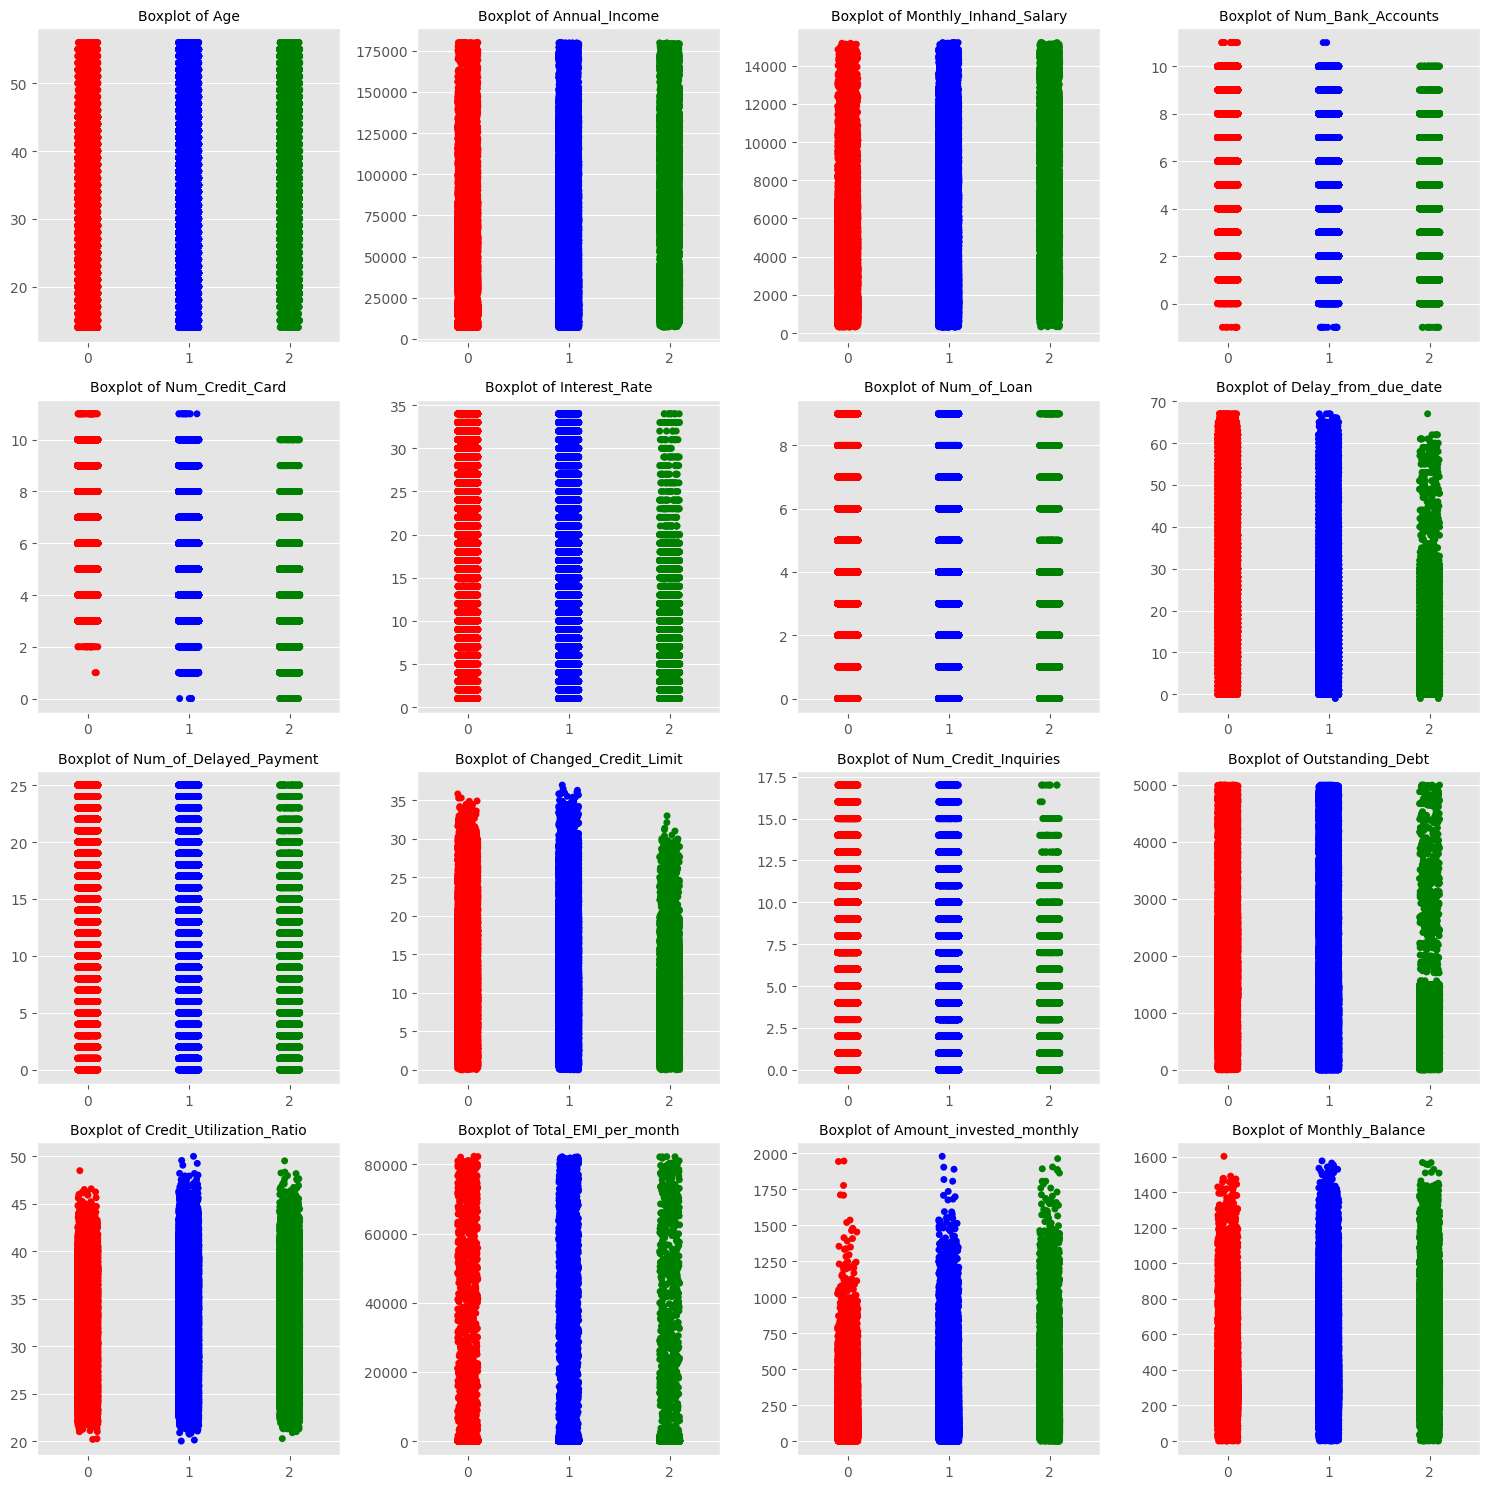

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
axes = axes.ravel()

for i,j in enumerate(X.select_dtypes(np.number).columns):
    sns.stripplot(df, x='Credit_Score', y=j, ax=axes[i], palette=['red', 'blue', 'green'])
    axes[i].set_title(f"Boxplot of {j}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

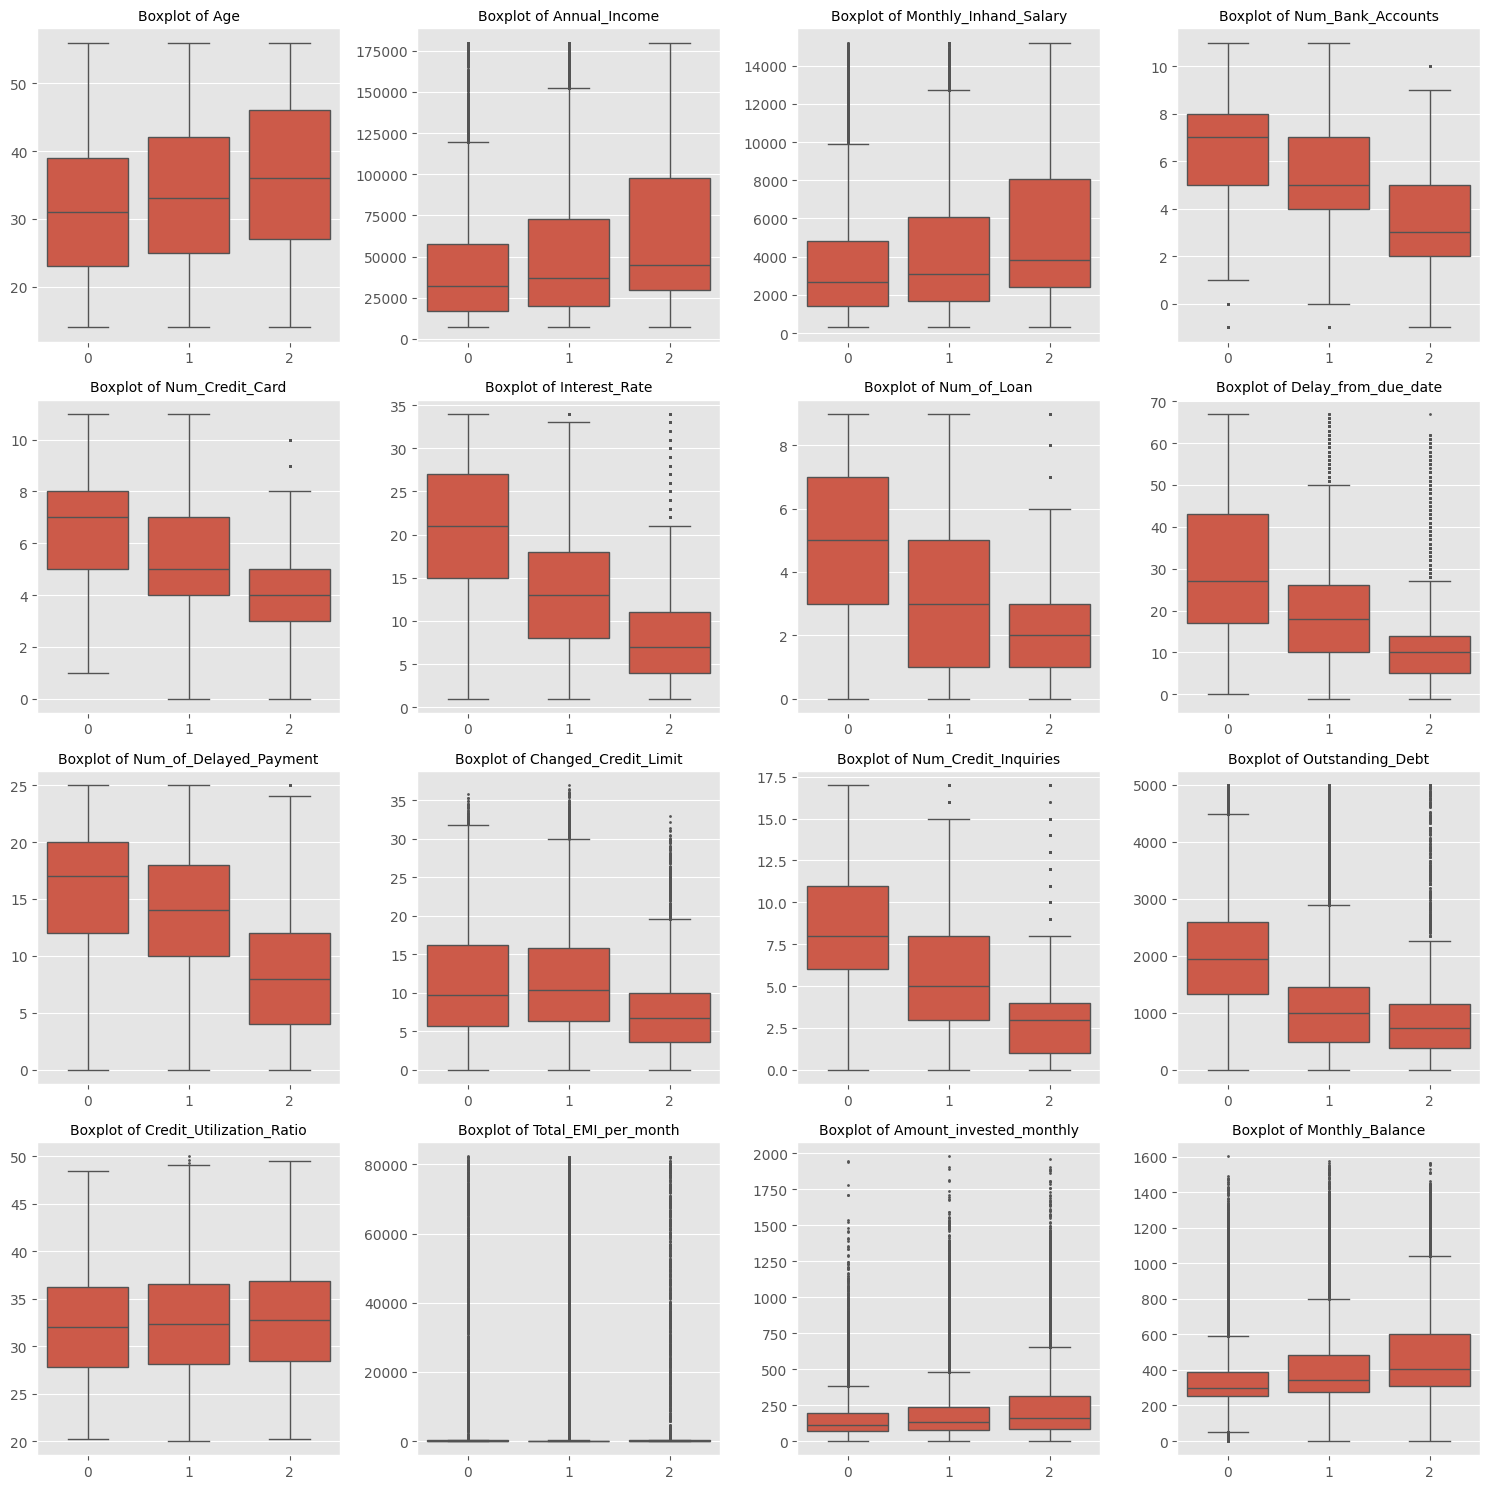

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))
axes = axes.ravel()

for i,j in enumerate(X.select_dtypes(np.number).columns):
    sns.boxplot(df, x='Credit_Score', y=j, ax=axes[i], fliersize=1)
    axes[i].set_title(f"Boxplot of {j}", fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Strip Plots aren't able to provide good insights. On the other hand, boxplots seem to provide some valuable insights. Boxes of 'Num_Credit_Card', 'Intrest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Dealyed_Payment', 'Num_Credit_Inquiries' are high for 'Poor' credit scores, which is obvious fact. Supervised Learning Models should be able to catch up on this fact to give accurate predictions.
#### Boxplot of 'Monthly_Balance' is high for 'Good' credit scores, suggesting good earners have relatively good credit scores compared to others.

## Inferential Statistics & Hypothesis Testing

### 1. Check whether the Annual income across all the target variables is significantly the same. The significant level is 0.05.

#### Performing One-way Anova Test
> $H_{0}$: $\mu_{1} = \mu_{2} = \mu_{3}$

> $H_{a}$: Atleast 1 target variable is different from the rest

In [16]:
df.groupby('Credit_Score')['Annual_Income'].mean()

Credit_Score
0    40584.515325
1    50987.164840
2    65203.672105
Name: Annual_Income, dtype: float64

#### Now, the normality and equality of variance assumptions need to be checked.

* #### For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* #### For equality of variance, Levene test is applied to the response variable.

In [17]:
# H0: Distribution is Normal, Ha: Distribution is not Normal
from scipy.stats import shapiro

test_stat, p_value = shapiro(df['Annual_Income'])
print('The p-value is', p_value)

The p-value is 0.0


In [18]:
# H0: All population variances are equal, Ha: At least one variance is different from the rest
from scipy.stats import levene

test_stat, p_value = levene(df[df['Credit_Score'] == 0]['Annual_Income'], df[df['Credit_Score'] == 1]['Annual_Income'],
                            df[df['Credit_Score'] == 2]['Annual_Income'])

print('The p-value is', p_value)

The p-value is 0.0


#### Since Shapiro-Wilk's and Levene's tests are rejected, we can't perform parametric tests such as One Way Anova followed by post-hoc Tukey HSD Comparision test. Instead we'll go with non-parametric Kruskal-Wallis test followed by post-hoc Dunn's test

In [19]:
# Performing Kruskal-Wallis Test
from scipy.stats import kruskal

test_stat, p_value = kruskal(df[df['Credit_Score'] == 0]['Annual_Income'], df[df['Credit_Score'] == 1]['Annual_Income'],
                            df[df['Credit_Score'] == 2]['Annual_Income'])

print('The p-value is',p_value)

The p-value is 0.0


In [20]:
# Performing post-hoc Dunn's Test
import scikit_posthocs as sp

a = sp.posthoc_dunn([df[df['Credit_Score'] == 0]['Annual_Income'], df[df['Credit_Score'] == 1]['Annual_Income'],
                            df[df['Credit_Score'] == 2]['Annual_Income']], p_adjust = 'bonferroni')

a.columns = [0,1,2]
a.index = [0,1,2]
a

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


#### All the pairs got p-values very close to 0. Thus we can statistically conclude that Annual Income across different target variable classes is not significantly the same.

---

### 2. Check if there is an independence of the Occupation and Credit Score. The significant level is 0.05.

#### Performing Chi-Square Test for Independence
> $H_{0}$: Occupation is independent of Credit Score

> $H_{a}$: Occupation is dependent of Credit Score

In [21]:
contingency_table = df.pivot_table(index='Occupation', columns='Credit_Score', aggfunc='size')
contingency_table

Credit_Score,0,1,2
Occupation,,,
0,2037,3502,1205
1,1855,3736,1233
2,1924,3586,1210
3,1804,3600,1164
4,2094,3506,1264
5,2033,3430,1185
6,1840,3442,1254
7,1965,3872,1259
8,1856,3386,1190


In [22]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('Test Statistic:',chi)
print('P-value:',p_value)

Test Statistic: 180.6858883951274
P-value: 2.9071037475037877e-24


#### As the p-value is much less than the significance level, we can reject the $H_0$. Hence, we have enough statistical evidence to say that Occupation and Credit Score have a relationship at 5% significance level.

---

### 3. Check if there is a relationship between the Payment Behaviour and Credit Score.

#### Same as above, using Chi-Square Test for Independence

In [23]:
contingency_table = df.pivot_table(index='Payment_Behaviour', columns='Credit_Score', aggfunc='size')
contingency_table

Credit_Score,0,1,2
Payment_Behaviour,,,
0,245,461,195
1,3241,8281,3502
2,4915,10423,3834
3,3212,6370,2176
4,3032,5793,1939
5,4373,7468,2600
6,9980,14378,3582


In [24]:
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('Test Statistic:',chi)
print('P-value:',p_value)

Test Statistic: 1567.3878881227215
P-value: 0.0


#### As the p-value is much less than the significance level, we can reject the $H_0$. Hence, we have enough statistical evidence to say that Payment Behaviour and Credit Score have a relationship at 5% significance level.

---

### 4. Check Statistically that the Credit_Utilization_Ratio mean values are significantly not different across the target variable classes.

#### Performing One-way Anova Test
> $H_{0}$: $\mu_{1} = \mu_{2} = \mu_{3}$

> $H_{a}$: Atleast 1 target variable is different from the rest

In [25]:
df.groupby('Credit_Score')['Credit_Utilization_Ratio'].mean()

Credit_Score
0    31.986146
1    32.313820
2    32.686107
Name: Credit_Utilization_Ratio, dtype: float64

#### Now, the normality and equality of variance assumptions need to be checked.

* #### For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* #### For equality of variance, Levene test is applied to the response variable.

In [26]:
# H0: Distribution is Normal, Ha: Distribution is not Normal
from scipy.stats import shapiro

test_stat, p_value = shapiro(df['Credit_Utilization_Ratio'])
print('The p-value is', p_value)

The p-value is 0.0


In [27]:
# H0: All population variances are equal, Ha: At least one variance is different from the rest
from scipy.stats import levene

test_stat, p_value = levene(df[df['Credit_Score'] == 0]['Credit_Utilization_Ratio'], df[df['Credit_Score'] == 1]['Credit_Utilization_Ratio'],
                            df[df['Credit_Score'] == 2]['Credit_Utilization_Ratio'])

print('The p-value is', p_value)

The p-value is 0.0002230896840749341


#### Since Shapiro-Wilk's and Levene's tests are rejected, we can't perform parametric tests such as One Way Anova followed by post-hoc Tukey HSD Comparision test. Instead we'll go with non-parametric Kruskal-Wallis test followed by post-hoc Dunn's test

In [28]:
# Performing Kruskal-Wallis Test
from scipy.stats import kruskal

test_stat, p_value = kruskal(df[df['Credit_Score'] == 0]['Credit_Utilization_Ratio'], df[df['Credit_Score'] == 1]['Credit_Utilization_Ratio'],
                            df[df['Credit_Score'] == 2]['Credit_Utilization_Ratio'])

print('The p-value is',p_value)

The p-value is 1.0820113066707541e-39


In [29]:
# Performing post-hoc Dunn's Test
import scikit_posthocs as sp

a = sp.posthoc_dunn([df[df['Credit_Score'] == 0]['Credit_Utilization_Ratio'], df[df['Credit_Score'] == 1]['Credit_Utilization_Ratio'],
                            df[df['Credit_Score'] == 2]['Credit_Utilization_Ratio']], p_adjust = 'bonferroni')

a.columns = [0,1,2]
a.index = [0,1,2]
a

,0,1,2
0,1.000000e+00,1.296696e-15,9.328368e-40
1,1.296696e-15,1.000000e+00,2.876233e-14
2,9.328368e-40,2.876233e-14,1.000000e+00


#### All the pairs got p-values very close to 0. Thus we can statistically conclude that Annual Income across different target variable classes is not significantly the same.

---

## END OF DESCRIPTIVE AND INFERENTIAL STATISTICS.